<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/%E7%8E%89%E5%B1%B1AI%E6%AF%94%E8%B3%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 原始資料

In [92]:
import pandas as pd
train = pd.read_csv("/content/drive/My Drive/玉山人工智慧比賽數據/train.csv")
print(train.shape)
train.head()

(1521787, 23)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [93]:
train.isnull().sum()

acqic            0
bacno            0
cano             0
conam            0
contp            0
csmcu            0
ecfg             0
etymd            0
flbmk        12581
flg_3dsmk    12581
fraud_ind        0
hcefg            0
insfg            0
iterm            0
locdt            0
loctm            0
mcc              0
mchno            0
ovrlt            0
scity            0
stocn            0
stscd            0
txkey            0
dtype: int64

# 樣本y分布

0    1501432
1      20355
Name: fraud_ind, dtype: int64

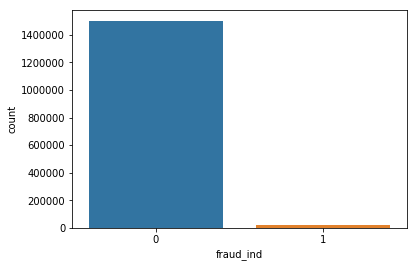

In [94]:
import seaborn as sns
sns.countplot(train['fraud_ind'])
train['fraud_ind'].value_counts()

# 原始預測資料

In [95]:
test = pd.read_csv("/content/drive/My Drive/玉山人工智慧比賽數據/test.csv")
print(test.shape)
test_txkey = test["txkey"]
test.head()

(421665, 22)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,102,215328.0,457,59360,N,0,102,0,592489
1,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,102,222007.0,457,59360,N,0,102,0,592452
2,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,100,170013.0,457,59360,N,0,102,0,590212
3,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,100,165914.0,457,59360,N,0,102,0,590209
4,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,102,215311.0,457,59360,N,0,102,0,592488


In [96]:
test.isnull().sum()

acqic           0
bacno           0
cano            0
conam           0
contp           0
csmcu           0
ecfg            0
etymd           0
flbmk        3715
flg_3dsmk    3715
hcefg           0
insfg           0
iterm           0
locdt           0
loctm           0
mcc             0
mchno           0
ovrlt           0
scity           0
stocn           0
stscd           0
txkey           0
dtype: int64

# check 為何導致缺失值

In [97]:
train[train.flbmk.notnull()].head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [98]:
train[train.flbmk.isnull()].head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
4827,6881,126303,109048,513.80,5,75,N,0,NaN,NaN,0,6,N,0,32,94554.0,457,86584,N,0,102,0,514184
5906,0,85832,151082,465.62,5,75,N,2,NaN,NaN,0,6,N,0,75,101125.0,451,0,N,5817,102,0,35813
7136,6769,79167,66200,1.38,5,75,Y,8,NaN,NaN,0,6,N,0,62,95159.0,373,79246,N,5817,102,0,174845
7523,0,108456,157230,465.62,5,75,N,2,NaN,NaN,0,6,N,0,58,101823.0,451,0,N,5817,102,0,27683
37299,0,137666,179303,465.62,5,75,N,2,NaN,NaN,0,6,N,0,8,104449.0,451,0,N,5817,102,0,3523


In [99]:
train.dtypes

acqic          int64
bacno          int64
cano           int64
conam        float64
contp          int64
csmcu          int64
ecfg          object
etymd          int64
flbmk         object
flg_3dsmk     object
fraud_ind      int64
hcefg          int64
insfg         object
iterm          int64
locdt          int64
loctm        float64
mcc            int64
mchno          int64
ovrlt         object
scity          int64
stocn          int64
stscd          int64
txkey          int64
dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

def box_plot(S1,S2):
  S1 = S1.fillna('unknow')
  S2 = S2.fillna('unknow')
  le_1 = LabelEncoder()
  le_2 = LabelEncoder()
  sns.boxplot(le_1.fit_transform(S1),le_2.fit_transform(S2))
  plt.xticks(np.arange(len(le_1.classes_)),le_1.classes_)
  plt.yticks(np.arange(len(le_2.classes_)),le_2.classes_)
  plt.xlabel(S1.name)
  plt.ylabel(S2.name)
  plt.show()

In [0]:
import seaborn as sns
#for col in train.columns:
#  if train[col].dtype in ['float64','int64']:
#    # kde plot
#    sns.kdeplot(train[train.flbmk.notnull()][col],label='flbmk notnull')
#    sns.kdeplot(train[train.flbmk.isnull()][col],label='flbmk isnull')
#    plt.legend()
#    plt.title(col)
#    plt.ylabel('frequency')
#    plt.xlabel(col)
#    plt.show()
#  if train[col].dtype in ['object']:
#    # bot plot
#    box_plot(train[col],train['flbmk'])

# fill na(這裡把缺失值用unknown代替)

In [102]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

train['flbmk'] = train['flbmk'].fillna('unknown')
train['flg_3dsmk'] = train['flg_3dsmk'].fillna('unknown')
test['flbmk'] = test['flbmk'].fillna('unknown')
test['flg_3dsmk'] = test['flg_3dsmk'].fillna('unknown')

print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

25162
7430
0
0


# check data type&len(unique)

In [103]:
for col in train.columns:
  u = len(train[col].unique())
  d = train[col].dtype
  print("{}'s unique is {} dtype is {}".format(col,u,d))

acqic's unique is 6051 dtype is int64
bacno's unique is 95214 dtype is int64
cano's unique is 129413 dtype is int64
conam's unique is 72961 dtype is float64
contp's unique is 7 dtype is int64
csmcu's unique is 72 dtype is int64
ecfg's unique is 2 dtype is object
etymd's unique is 11 dtype is int64
flbmk's unique is 3 dtype is object
flg_3dsmk's unique is 3 dtype is object
fraud_ind's unique is 2 dtype is int64
hcefg's unique is 9 dtype is int64
insfg's unique is 2 dtype is object
iterm's unique is 9 dtype is int64
locdt's unique is 90 dtype is int64
loctm's unique is 84810 dtype is float64
mcc's unique is 434 dtype is int64
mchno's unique is 89316 dtype is int64
ovrlt's unique is 2 dtype is object
scity's unique is 5698 dtype is int64
stocn's unique is 103 dtype is int64
stscd's unique is 5 dtype is int64
txkey's unique is 1521787 dtype is int64


# 基於頻率的特徵萃取

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 盜刷紀錄次數/總紀錄次數,變成區間[0,1]範圍的浮點數,再用qcut切5個level
def Query_frequency(data,col):
  fraud_ind_total = data[data.fraud_ind == 1][col].value_counts()
  record_total = data[col].value_counts()
  Probability = fraud_ind_total/record_total
  Probability = Probability.fillna(0)
  cut_num = np.min([len(Probability.unique()),5])#最多切5段
  return pd.qcut(Probability.rank(method='first'),q=cut_num,labels=[i for i in range(cut_num)]).astype(int)

# 傳統方法特徵萃取 Label Encoding

In [105]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) > 0 :
          # Train on the training data
          le.fit(train[col])
          print(dict(zip(train[col].unique(),
                         [i for i in range(len(le.classes_))]
                        )))
          # Transform both training and testing data
          train[col] = le.transform(train[col])
          test[col] = le.transform(test[col])
          print(col,'do Label Encoding done!')
          # Keep track of how many columns were label encoded
          le_count += 1
            
print('%d columns were label encoded.' % le_count)

{'N': 0, 'Y': 1}
ecfg do Label Encoding done!
{'N': 0, 'Y': 1, 'unknown': 2}
flbmk do Label Encoding done!
{'N': 0, 'Y': 1, 'unknown': 2}
flg_3dsmk do Label Encoding done!
{'N': 0, 'Y': 1}
insfg do Label Encoding done!
{'N': 0, 'Y': 1}
ovrlt do Label Encoding done!
5 columns were label encoded.


# 把2(unknow)轉換回np.nan

In [106]:
train['flbmk'] = train['flbmk'].replace(2,np.nan)
train['flg_3dsmk'] = train['flg_3dsmk'].replace(2,np.nan)

test['flbmk'] = test['flbmk'].replace(2,np.nan)
test['flg_3dsmk'] = test['flg_3dsmk'].replace(2,np.nan)

print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

25162
7430


# KNN補值

In [107]:
print(train['flbmk'].unique())
print(train['flg_3dsmk'].unique())
print(test['flbmk'].unique())
print(test['flg_3dsmk'].unique())

[ 0.  1. nan]
[ 0.  1. nan]
[ 0. nan  1.]
[ 0.  1. nan]


In [0]:
def knn補值(df,features,y_name):
  knn = KNeighborsClassifier()
  dropna_df = df.dropna(axis=0)
  knn.fit(dropna_df[features],dropna_df[y_name])
  df.loc[df[df.isnull().values==True].index,[y_name]] = knn.predict(df.loc[df[df.isnull().values==True].index,features])
  return df

In [0]:
features = train.drop(['flbmk','flg_3dsmk','fraud_ind'],axis=1).columns.tolist()
train = knn補值(train,features,'flbmk')
train = knn補值(train,features,'flg_3dsmk')
test  = knn補值(test,features,'flbmk')
test  = knn補值(test,features,'flg_3dsmk')

In [110]:
print(train['flbmk'].unique())
print(train['flg_3dsmk'].unique())
print(test['flbmk'].unique())
print(test['flg_3dsmk'].unique())

[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]


# One-Hot Encoding

In [111]:
print(train.shape)
print(test.shape)

(1521787, 23)
(421665, 22)


In [112]:
# one-hot encoding of categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (1521787, 23)
Testing Features shape:  (421665, 22)


In [113]:
#one hot encoding後缺失值check
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


In [114]:
train.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,0,0,0.0,0.0,0,5,0,0,33,172652.0,457,59333,0,0,102,0,516056
1,0,134508,45725,465.62,5,0,0,2,0.0,0.0,0,0,0,0,9,105114.0,451,0,0,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,0,0,0.0,0.0,0,5,0,0,6,152458.0,457,59333,0,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,0,5,0.0,0.0,0,5,0,0,5,172946.0,247,50436,0,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,0,4,0.0,0.0,0,5,0,0,6,182129.0,263,93775,0,5817,102,0,1051004


In [115]:
test.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,163188,116799,513.8,5,0,0,0,0.0,0.0,5,0,0,102,215328.0,457,59360,0,0,102,0,592489
1,6881,163188,116799,513.8,5,0,0,0,0.0,0.0,5,0,0,102,222007.0,457,59360,0,0,102,0,592452
2,6881,163188,116799,513.8,5,0,0,0,0.0,0.0,5,0,0,100,170013.0,457,59360,0,0,102,0,590212
3,6881,163188,116799,513.8,5,0,0,0,0.0,0.0,5,0,0,100,165914.0,457,59360,0,0,102,0,590209
4,6881,163188,116799,513.8,5,0,0,0,0.0,0.0,5,0,0,102,215311.0,457,59360,0,0,102,0,592488


# 根據不同條件觀察盜刷發生機率

In [0]:
y_name = 'fraud_ind'

count    6051.000000
mean        1.999669
std         1.414447
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: acqic, dtype: float64
6051


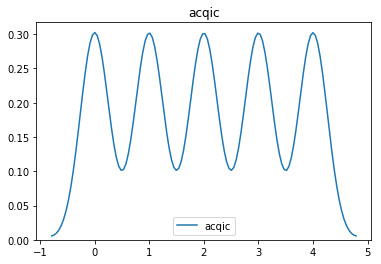

count    95214.000000
mean         2.000000
std          1.414228
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: bacno, dtype: float64
95214


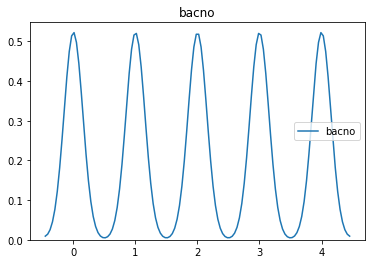

count    129413.000000
mean          2.000000
std           1.414224
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: cano, dtype: float64
129413


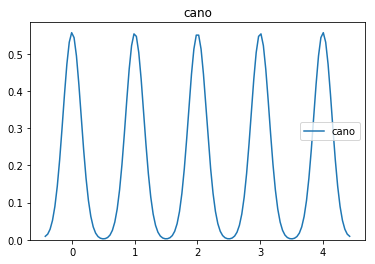

count    72961.000000
mean         1.999973
std          1.414233
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: conam, dtype: float64
72961


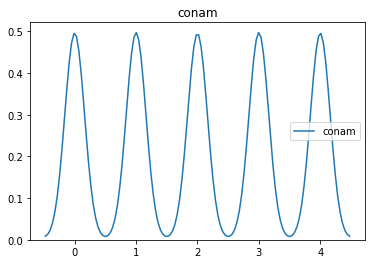

count    7.000000
mean     2.000000
std      1.732051
min      0.000000
25%      0.500000
50%      2.000000
75%      3.500000
max      4.000000
Name: contp, dtype: float64
7


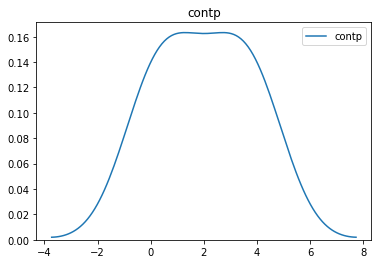

count    72.000000
mean      2.000000
std       1.443782
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: csmcu, dtype: float64
72


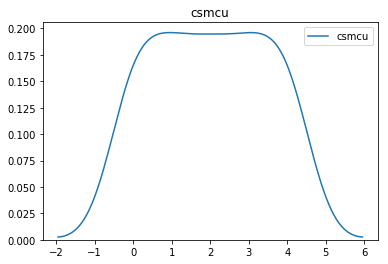

count    2.000000
mean     0.500000
std      0.707107
min      0.000000
25%      0.250000
50%      0.500000
75%      0.750000
max      1.000000
Name: ecfg, dtype: float64
2


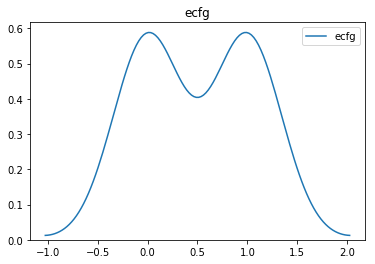

count    11.000000
mean      1.818182
std       1.537412
min       0.000000
25%       0.500000
50%       2.000000
75%       3.000000
max       4.000000
Name: etymd, dtype: float64
11


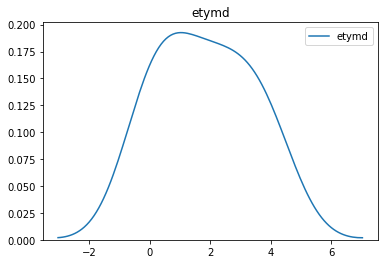

count    2.000000
mean     0.500000
std      0.707107
min      0.000000
25%      0.250000
50%      0.500000
75%      0.750000
max      1.000000
Name: flbmk, dtype: float64
2


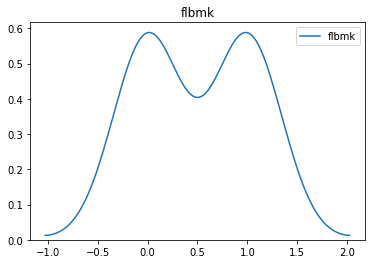

count    2.000000
mean     0.500000
std      0.707107
min      0.000000
25%      0.250000
50%      0.500000
75%      0.750000
max      1.000000
Name: flg_3dsmk, dtype: float64
2


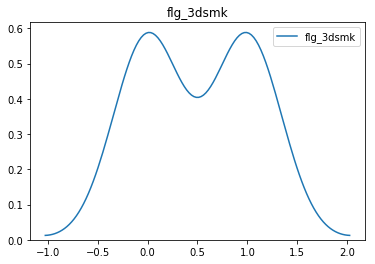

count    9.000000
mean     2.000000
std      1.581139
min      0.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      4.000000
Name: hcefg, dtype: float64
9


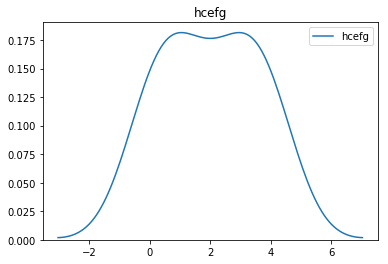

count    2.000000
mean     0.500000
std      0.707107
min      0.000000
25%      0.250000
50%      0.500000
75%      0.750000
max      1.000000
Name: insfg, dtype: float64
2


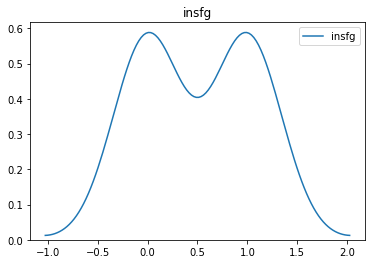

count    9.000000
mean     2.000000
std      1.581139
min      0.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      4.000000
Name: iterm, dtype: float64
9


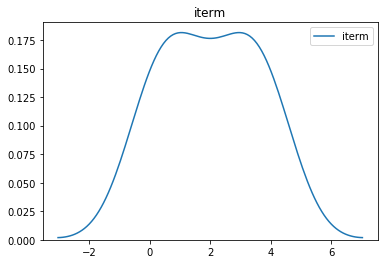

count    90.000000
mean      2.000000
std       1.422136
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: locdt, dtype: float64
90


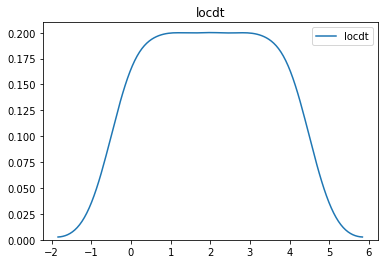

count    84810.000000
mean         2.000000
std          1.414222
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: loctm, dtype: float64
84810


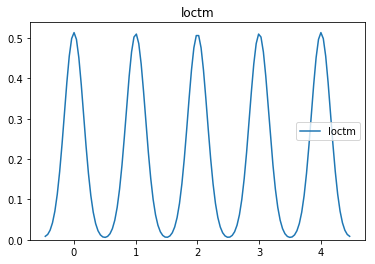

count    434.000000
mean       2.000000
std        1.417476
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: mcc, dtype: float64
434


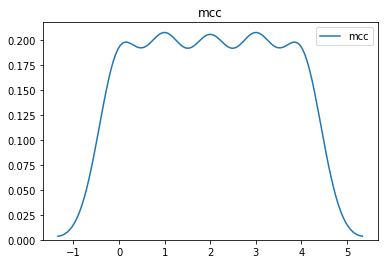

count    89316.000000
mean         1.999978
std          1.414229
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: mchno, dtype: float64
89316


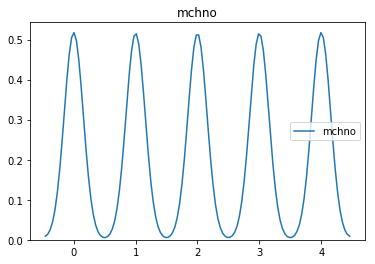

count    2.000000
mean     0.500000
std      0.707107
min      0.000000
25%      0.250000
50%      0.500000
75%      0.750000
max      1.000000
Name: ovrlt, dtype: float64
2


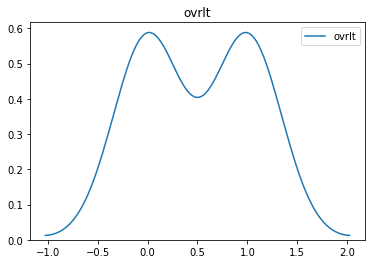

count    5698.000000
mean        2.000000
std         1.414462
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: scity, dtype: float64
5698


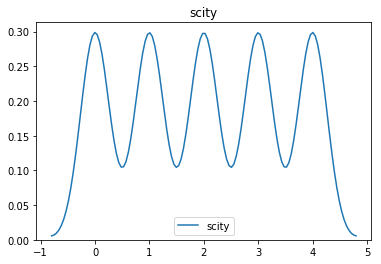

count    103.000000
mean       2.000000
std        1.428011
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: stocn, dtype: float64
103


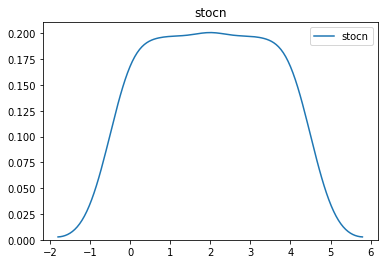

count    5.00000
mean     1.20000
std      1.30384
min      0.00000
25%      0.00000
50%      1.00000
75%      2.00000
max      3.00000
Name: stscd, dtype: float64
5


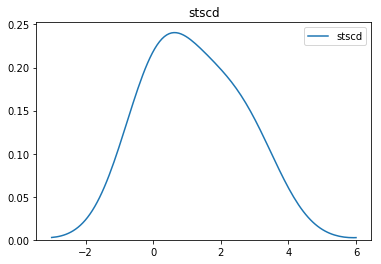

count    1521787.0
mean           0.5
std            0.5
min            0.0
25%            0.0
50%            0.0
75%            1.0
max            1.0
Name: txkey, dtype: float64
1521787


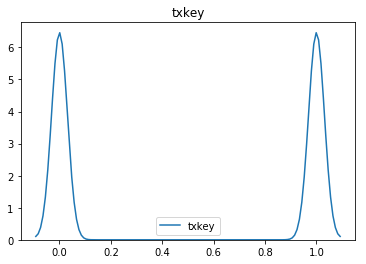

In [117]:
for col in train.drop(y_name,axis=1).columns:
  print(Query_frequency(train,col).describe())
  print(len(train[col].unique()))
  sns.kdeplot(Query_frequency(train,col))
  plt.title(col)
  plt.show()

# 特徵工程

In [118]:
x_columns = train.drop(y_name,axis=1).columns.tolist()
print(len(train.columns))
print(len(x_columns))

23
22


# 將特徵用Query_frequency這個function轉換

In [0]:
#for col in x_columns:
#  P = Query_frequency(train,col)
#  train[col] = train[col].map(P)
#  test[col] = test[col].map(P)

# select columns

In [121]:
features = set(train.columns[train.isnull().sum()==0])&set(test.columns[test.isnull().sum()==0])
features = list(features)
print(features)
print(len(features))
print([y_name])

['hcefg', 'ecfg', 'etymd', 'txkey', 'loctm', 'conam', 'stocn', 'insfg', 'stscd', 'flbmk', 'ovrlt', 'mchno', 'bacno', 'acqic', 'cano', 'scity', 'locdt', 'csmcu', 'contp', 'mcc', 'flg_3dsmk', 'iterm']
22
['fraud_ind']


# train and test

In [122]:
train = train[features+[y_name]]
test = test[features]
print(train.shape)
print(train.head())
print(test.shape)
print(test.head())

(1521787, 23)
   hcefg  ecfg  etymd    txkey  ...  mcc  flg_3dsmk  iterm  fraud_ind
0      5     0      0   516056  ...  457        0.0      0          0
1      0     0      2     4376  ...  451        0.0      0          0
2      5     0      0   483434  ...  457        0.0      0          0
3      5     0      5  1407164  ...  247        0.0      0          0
4      5     0      4  1051004  ...  263        0.0      0          0

[5 rows x 23 columns]
(421665, 22)
   hcefg  ecfg  etymd   txkey     loctm  ...  csmcu  contp  mcc  flg_3dsmk  iterm
0      5     0      0  592489  215328.0  ...      0      5  457        0.0      0
1      5     0      0  592452  222007.0  ...      0      5  457        0.0      0
2      5     0      0  590212  170013.0  ...      0      5  457        0.0      0
3      5     0      0  590209  165914.0  ...      0      5  457        0.0      0
4      5     0      0  592488  215311.0  ...      0      5  457        0.0      0

[5 rows x 22 columns]


# standscaler

In [0]:
#from sklearn.preprocessing import StandardScaler
#def scaler
#scaler = StandardScaler()
#scaler.fit(train[features])

#transform
#train[features] = scaler.transform(train[features])
#test[features] = scaler.transform(test[features])

#print result
#print(train.head())
#print(test.head())

# corr

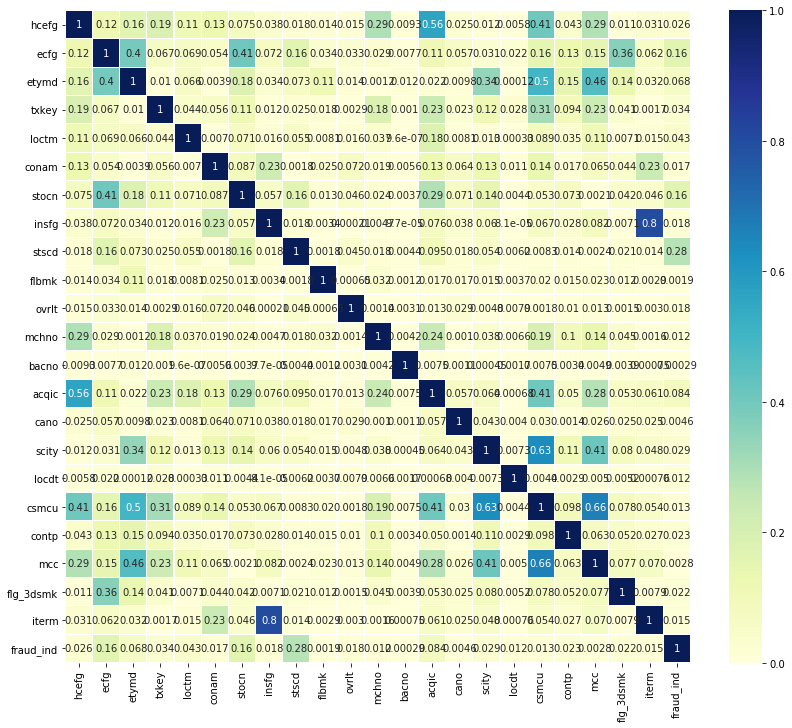

In [124]:
fig = plt.figure(figsize=(14,12))
sns.heatmap(abs(train.corr()),annot=True,linewidths=0.1,cmap='YlGnBu')

# X,y split

In [125]:
from sklearn.model_selection import train_test_split
X = train[features]
y = train[y_name]
print(X.head())
print(y.head())

   hcefg  ecfg  etymd    txkey     loctm  ...  csmcu  contp  mcc  flg_3dsmk  iterm
0      5     0      0   516056  172652.0  ...      0      5  457        0.0      0
1      0     0      2     4376  105114.0  ...      0      5  451        0.0      0
2      5     0      0   483434  152458.0  ...      0      5  457        0.0      0
3      5     0      5  1407164  172946.0  ...     62      5  247        0.0      0
4      5     0      4  1051004  182129.0  ...     62      5  263        0.0      0

[5 rows x 22 columns]
0    0
1    0
2    0
3    0
4    0
Name: fraud_ind, dtype: int64


# 調整採樣平衡

In [126]:
print(y.value_counts())

0    1501432
1      20355
Name: fraud_ind, dtype: int64


In [127]:
from imblearn.under_sampling import RandomUnderSampler

#run
ros = RandomUnderSampler()
X平衡 ,y平衡 = ros.fit_sample(X,y)

#res
print(pd.Series(y平衡).value_counts())

#transform to df
X = pd.DataFrame(X平衡,columns=X.columns)
#transform to Series
y = pd.Series(y平衡,name=y.name)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(

1    20355
0    20355
dtype: int64


# train_val split

In [128]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
print(X_train.shape,X_val.shape)
print(y_train.shape,y_val.shape)

(32568, 22) (8142, 22)
(32568,) (8142,)


# modeling

In [129]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(objective="reg:squarederror")
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='reg:squarederror', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [130]:
xgbc.score(X_val,y_val)

0.9271677720461803

In [131]:
y_pred = xgbc.predict(X_val)
pd.Series(y_pred).value_counts()

1    4211
0    3931
dtype: int64

# report

In [132]:
from sklearn.metrics import classification_report 
target_names = ['0','1']
print(classification_report(y_val,y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      4148
           1       0.90      0.95      0.93      3994

    accuracy                           0.93      8142
   macro avg       0.93      0.93      0.93      8142
weighted avg       0.93      0.93      0.93      8142



# 產生submission

In [133]:
test_X = test[features]
test_X.head()

,hcefg,ecfg,etymd,txkey,loctm,conam,stocn,insfg,stscd,flbmk,ovrlt,mchno,bacno,acqic,cano,scity,locdt,csmcu,contp,mcc,flg_3dsmk,iterm
0,5,0,0,592489,215328.0,513.8,102,0,0,0.0,0,59360,163188,6881,116799,0,102,0,5,457,0.0,0
1,5,0,0,592452,222007.0,513.8,102,0,0,0.0,0,59360,163188,6881,116799,0,102,0,5,457,0.0,0
2,5,0,0,590212,170013.0,513.8,102,0,0,0.0,0,59360,163188,6881,116799,0,100,0,5,457,0.0,0
3,5,0,0,590209,165914.0,513.8,102,0,0,0.0,0,59360,163188,6881,116799,0,100,0,5,457,0.0,0
4,5,0,0,592488,215311.0,513.8,102,0,0,0.0,0,59360,163188,6881,116799,0,102,0,5,457,0.0,0


In [134]:
 submission = pd.DataFrame()
submission["txkey"] = test_txkey
submission["fraud_ind"] = xgbc.predict(test_X)
submission.head()

,txkey,fraud_ind
0,592489,0
1,592452,0
2,590212,0
3,590209,0
4,592488,0


In [0]:
submission.to_csv("./submission_9.csv")

In [136]:
print(submission["fraud_ind"].value_counts())

0    372776
1     48889
Name: fraud_ind, dtype: int64
